# 1D convolutions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg
import time

from scipy.linalg import toeplitz, circulant

Consider the square wave discrete signal:

$$ \mathbf{v}_i=
\begin{cases}
0, & i = 1,\dots, 50 \\
1, & i = 51,\dots, 75 \\
0, & i = 76,\dots, 100 \\
\end{cases}
$$

Define the vector $\mathbf{v}$ and plot the corresponding signal.

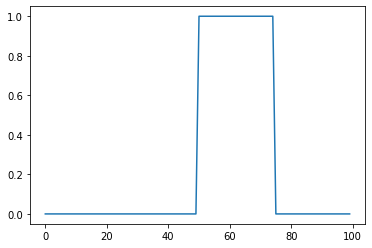

In [ ]:
v = np.zeros(100)
v[50:75]=1
plt.plot(v)

Consider the following kernels $\mathbf{k}$:

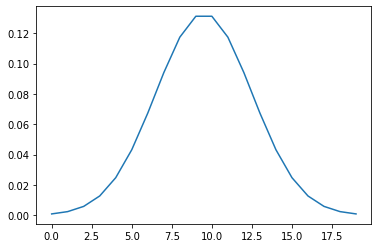

In [ ]:
### first kernel
#k = np.ones(10)/10

### second kernel
k = signal.gaussian(20, std=3)
k = k / np.sum(k)

### third kernel
#k = np.array([-1,2,-1])

plt.plot(k)

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 4 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

In [ ]:
N = len(v)
M = len(k)

## 1. Toeplitz matrix

Define a Toeplitz matrix $K$ associated with the kernel $\mathbf{k}$.
Then, compute the convolution between $\mathbf{k}$ and $\mathbf{v}$, exploiting the property:

$\mathbf{k} * \mathbf{v} = K \mathbf{v}$

Time to compute this convolution: 6.125e-04


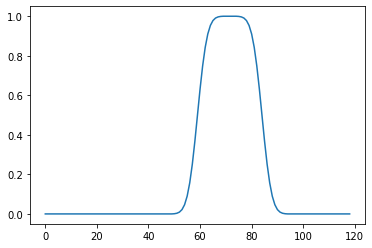

In [ ]:
t0 = time.time()
#toeplitz(k, ) #(1st column, 2nd row)
#v(100x1) (input 100)
#K(101x100) (filter 10)
k_padded = np.zeros(N+M-1)
k_padded[:M] = k
K = linalg.toeplitz(k_padded, np.zeros(N))
v_conv_1 = K @ v
print("Time to compute this convolution: %1.3e" % (time.time() - t0))

plt.plot(v_conv_1)

## 2. Direct definition (sums of products)

The convolution without "boundary layer" (i.e. the part of the vector which is identical between the standard and the circular convolutions), is given by:

$(\mathbf{k} * \mathbf{v})_i = \sum_{j = 0}^{n_k - 1} \mathbf{k}_{n_k - j} \mathbf{v}_{i + j}$

for $i = 1, \dots, n_v - n_k + 1$.

Time to compute this convolution: 3.172e-03


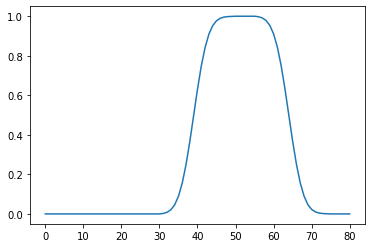

In [ ]:
t0 = time.time()
n_out = N -M +1
v_conv_2 = np.zeros(n_out)
for i in range(n_out):
  for j in range(M):
    v_conv_2[i] += k[-j] * v[i+j]

print("Time to compute this convolution: %1.3e" % (time.time() - t0))
plt.plot(v_conv_2)

Time to compute this convolution: 8.048e+02


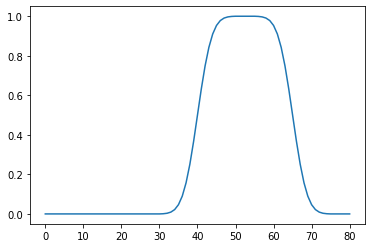

In [91]:

n_out = N -M +1
#v_conv_2 = np.zeros(n_out)
#for i in range(n_out):
#  v_conv_2[i] = np.sum(np.flip(k) * v[i:i+M]) 

v_conv_2 = np.array([np.sum(np.flip(k) * v[i:i+M]) for i in range(n_out)])  

print("Time to compute this convolution: %1.3e" % (time.time() - t0))
plt.plot(v_conv_2)

## 3. Convolution through DFT

When the two signals have the same size, we have:

$ \widehat{\mathbf{v} \circledast \mathbf{k}} = \widehat{\mathbf{v}} \odot \widehat{\mathbf{k}} $

Where:
- $\hat{\mathbf{a}}$ is the DFT of the signal $\mathbf{a}$
- $\circledast$ is the circular convolution
- $\odot$ is the Hadamard product

When the two signals do not have the same size, the above formula can be applied simply by "zero-padding" the shorter signal (N.B: this is automatically done by the `numpy.fft.fft` command by passing the required length as second argument).

Besides the filtered signal, plot the DFT of the two signals and of their convolution.


Time to compute this convolution: 1.360e-03


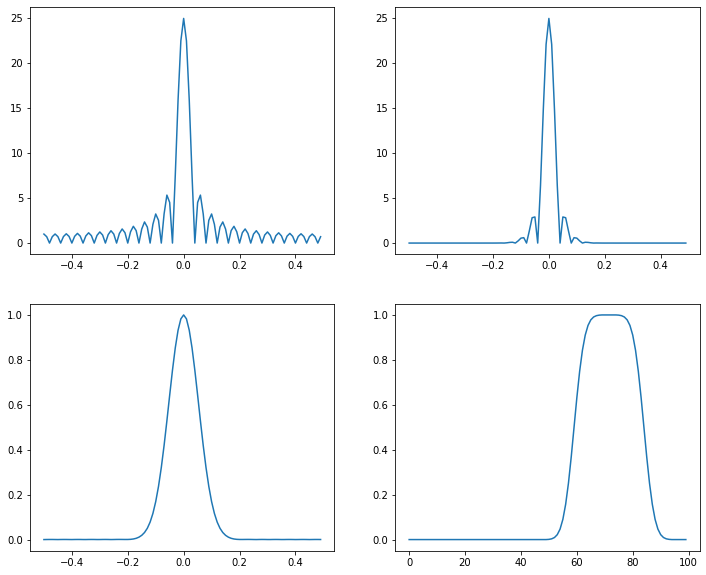

In [ ]:
t0 = time.time()
v_dft = np.fft.fft(v) #the output in son ordered, so we use the command shift to reorder it
k_dft = np.fft.fft(k, N)
vk_dft = v_dft * k_dft
v_conv_3 = np.real(np.fft.ifft(vk_dft))

freq = np.fft.fftshift(np.fft.fftfreq(N))
print("Time to compute this convolution: %1.3e" % (time.time() - t0))

fig, axs = plt.subplots(2,2, figsize=(12,10))
axs[0,0].plot(freq,np.absolute(np.fft.fftshift(v_dft)))
axs[1,0].plot(freq,np.absolute(np.fft.fftshift(k_dft)))
axs[0,1].plot(freq,np.absolute(np.fft.fftshift(vk_dft)))
axs[1,1].plot(v_conv_3)

## 4. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

Time to compute this convolution: 1.745e-03


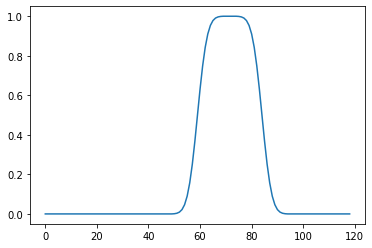

In [ ]:
t0 = time.time()
v_conv_4 = signal.convolve(v, k, mode = 'full')

print("Time to compute this convolution: %1.3e" % (time.time() - t0))
plt.plot(v_conv_4)